In [2]:
# 기본 패키지 불러오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
plt.style.use("seaborn")
sns.set(font_scale=1)
sns.set_style("whitegrid")

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 맥 OS 폰트 깨짐 방지 코드
from matplotlib import rc
import matplotlib as mpl 
import matplotlib.font_manager as fm 

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비
- 가격_관계분석_런던2.ipynb 파일과 동일하게 전처리 진행

## 데이터 불러오기

In [3]:
# 데이터 불러오기
london_lists_raw = pd.read_csv('../../../../data_weekly/inside_airbnb/London/listings.csv')
london_lists_summary_raw = pd.read_csv('../../../../data_weekly/inside_airbnb/London/listings_outline.csv')
london_neighbourhoods_raw = pd.read_csv('../../../../data_weekly/inside_airbnb/London/neighbourhoods.csv')
london_reviews_raw = pd.read_csv('../../../../data_weekly/inside_airbnb/London/reviews.csv')
london_reviews_summary_raw = pd.read_csv('../../../../data_weekly/inside_airbnb/London/reviews_outline.csv')

# 분석할 df 별도 복사
london_lists = london_lists_raw.copy()
london_reviews = london_reviews_raw.copy()

# 출력
london_lists.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,312761,https://www.airbnb.com/rooms/312761,20240319050633,2024-03-21,city scrape,Spacious Central London Apartment by Hoxton Sq...,"Very central location, in the middle of Shored...",Everything is so convenient and the area is al...,https://a0.muscache.com/pictures/miso/Hosting-...,1608226,...,5.00,4.89,4.93,NaN,f,1,1,0,0,0.86
1,13913,https://www.airbnb.com/rooms/13913,20240319050633,2024-03-20,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.83,4.70,4.70,NaN,f,3,2,1,0,0.25
2,15400,https://www.airbnb.com/rooms/15400,20240319050633,2024-03-20,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1,1,0,0,0.54
3,159736,https://www.airbnb.com/rooms/159736,20240319050633,2024-03-20,city scrape,A double Room 5mins from King's College Hospital,Calm sunny double room with a queen size bed a...,We love that in Loughborough Junction we live ...,https://a0.muscache.com/pictures/1067303/d2300...,766056,...,4.89,4.34,4.66,NaN,f,4,0,4,0,0.62
4,165336,https://www.airbnb.com/rooms/165336,20240319050633,2024-03-21,city scrape,Charming Flat in Notting Hill,A stylish apartment close to Portobello market...,"Notting Hill has many cafes, bars and restaura...",https://a0.muscache.com/pictures/60757460/47f8...,761400,...,4.96,4.87,4.71,NaN,f,1,1,0,0,1.57


## 데이터 불러온 최종일자 확인 

In [4]:
london_lists_raw['last_scraped'].unique()

array(['2024-03-21', '2024-03-20', '2024-03-22', '2024-03-19'],
      dtype=object)

슈퍼호스트 선정 기준 날짜 년 4회(분기별)
- 1월 1일 / 4월 1일 / 7월 1일 / 10월 1일 

## 분석에서 사용하지 않을 컬럼 삭제

In [5]:
# 1차 선별한 컬럼 25개 중 22개 2차 선별 + 1개(숙소_예약가능_여부)
# 최근 리뷰가 작성되었는지를 보기 위해 2개 컬럼 추가_240529 >> 'number_of_reviews_ltm' // 'last_review'
# URL 컬럼 london_lists에 적용_240530

columns_selected = ['id', 'listing_url', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed', 'property_type', \
    'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', \
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

# 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'minimum_nights', 'maximum_nights', 'has_availability',

# 선별한 컬럼만 적용
london_lists = london_lists[columns_selected]


# 변수 정리 
london_lists = london_lists.rename(columns={
    'id': '숙소_id',
    'listing_url' : '숙소_url',
    'host_id': '호스트_id',
    # 'host_response_time': '답변_평균시간',
    # 'host_response_rate': '문의_응답률',
    # 'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    # 'host_total_listings_count': '숙소_수',
    # 'host_has_profile_pic' : '프로필_사진',
    # 'host_identity_verified' : '호스트_신원',
    'neighbourhood_cleansed': '숙소_지역',
    'property_type' : '숙소_특징',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    # 'minimum_nights': '최소_숙박일',
    # 'maximum_nights': '최대_숙박일',
    'has_availability' : '예약_가능여부',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_ltm' : '12개월_리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'last_review' : '마지막_리뷰',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
 
})

# 컬럼명 확인
london_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        90852 non-null  int64  
 1   숙소_url       90852 non-null  object 
 2   호스트_id       90852 non-null  int64  
 3   슈퍼호스트        90463 non-null  object 
 4   숙소_지역        90852 non-null  object 
 5   숙소_특징        90852 non-null  object 
 6   숙소_유형        90852 non-null  object 
 7   수용_인원수       90852 non-null  int64  
 8   욕실수          57894 non-null  float64
 9   침실수          78118 non-null  float64
 10  침대수          57837 non-null  float64
 11  편의시설         90852 non-null  object 
 12  숙소_가격        57885 non-null  object 
 13  예약_가능여부      86773 non-null  object 
 14  리뷰수          90852 non-null  int64  
 15  12개월_리뷰수     90852 non-null  int64  
 16  30일_리뷰수      90852 non-null  int64  
 17  마지막_리뷰       65869 non-null  object 
 18  리뷰점수         65869 non-null  float64
 19  숙소_정

## 데이터 전처리
- 게스트 선호 숙소 파생 변수 생성 목적 
- 이상치 처리 부분 기존과 다르게 수정 

### 결측치 처리_아카이브 
- (상세 내용은 가격_관계분석_런던2.ipynb확인요망)

In [6]:
print(f'런던 데이터 전체 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 리뷰수가 0인 데이터 제거
condition_review_0 = london_lists['리뷰수'] == 0
london_lists = london_lists[~condition_review_0]
print(f'리뷰가 0인 데이터 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 카테고리 타입 데이터 비율 및 개수 세는 함수 선언
def CategoricalData_Count_Ratio(name_of_dataframe, name_of_column):

    print(f'전체 숙소 개수: {name_of_dataframe.shape[0]}개')
    print()

    type_list = name_of_dataframe[name_of_column].unique().tolist()

    for type in type_list:
        condition_type = name_of_dataframe[name_of_column] == type
        ratio_type = round((name_of_dataframe[condition_type].shape[0] / name_of_dataframe.shape[0]) * 100, 2)
        print(f'{name_of_column}이 {type}인 숙소의 개수: {name_of_dataframe[condition_type].shape[0]}개')
        print(f'{name_of_column}이 {type}인 숙소의 비율 : {ratio_type}%')
        print()


# 숙소 유형 [Entire home/apt / Private room] 데이터만 선별
condition_room_entirehomeapt = london_lists['숙소_유형'] == 'Entire home/apt'
condition_room_privateroom = london_lists['숙소_유형'] == 'Private room'
london_lists = london_lists[(condition_room_entirehomeapt | condition_room_privateroom)]
print('[Entire home/apt / Private room] 데이터만 선별 : ')
CategoricalData_Count_Ratio(london_lists, '숙소_유형')
print("-" * 60)

# 예약_가능여부 Null값 제거 및 예약 불가능 숙소 제거
london_lists = london_lists[london_lists["예약_가능여부"].notnull()]
condition_availability_f = london_lists['예약_가능여부'] == 'f'
london_lists = london_lists[~condition_availability_f]
print(f'Null값 제거 및 예약 불가능 숙소 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)


# 가격 null값 제거 
condition_price_notnull = london_lists['숙소_가격'].notnull()
london_lists = london_lists[condition_price_notnull] 
print(f'가격 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 슈퍼호스트 결측치 제거
london_lists = london_lists.dropna(subset=['슈퍼호스트'])
print(f'슈퍼호스트 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)


# 욕실수, 침대수, 침실수 결측치 제거
london_lists = london_lists.dropna(subset=['욕실수', '침실수', '침대수'])
print(f'욕실수, 침실수, 침대수 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)


# 각 리뷰 점수 컬럼 Null 값 제거 
type_review_null_any = london_lists[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']].isnull().any(axis=1)
london_lists = london_lists[~type_review_null_any]
print(f'각 리뷰점수 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

런던 데이터 전체 개수: 90852개
------------------------------------------------------------
리뷰가 0인 데이터 제거 후 데이터 개수: 65869개
------------------------------------------------------------
[Entire home/apt / Private room] 데이터만 선별 : 
전체 숙소 개수: 65499개

숙소_유형이 Entire home/apt인 숙소의 개수: 42642개
숙소_유형이 Entire home/apt인 숙소의 비율 : 65.1%

숙소_유형이 Private room인 숙소의 개수: 22857개
숙소_유형이 Private room인 숙소의 비율 : 34.9%

------------------------------------------------------------
Null값 제거 및 예약 불가능 숙소 제거 후 데이터 개수: 64110개
------------------------------------------------------------
가격 Null값 제거 후 데이터 개수: 43456개
------------------------------------------------------------
슈퍼호스트 Null값 제거 후 데이터 개수: 43190개
------------------------------------------------------------
욕실수, 침실수, 침대수 Null값 제거 후 데이터 개수: 43083개
------------------------------------------------------------
각 리뷰점수 Null값 제거 후 데이터 개수: 43061개
------------------------------------------------------------


### 게스트 선호 숙소 조건에 따른 DF 분류 
- 별점 4.9 이상
- 2년 간 후기 개수 5개 이상 
- 예약 취소 및 고객 컴플레인 1% 미만  >> 슈퍼 호스트로 대체

#### 슈퍼호스트 컬럼 확인

In [7]:
# 슈퍼호스트 데이터 개수 확인 
CategoricalData_Count_Ratio(london_lists, '슈퍼호스트')

전체 숙소 개수: 43061개

슈퍼호스트이 t인 숙소의 개수: 11283개
슈퍼호스트이 t인 숙소의 비율 : 26.2%

슈퍼호스트이 f인 숙소의 개수: 31778개
슈퍼호스트이 f인 숙소의 비율 : 73.8%



#### '게스트 선호 숙소' 조건에 따른 DF 분리

In [8]:
# 최근 2년간 리뷰가 5개 이상인 조건 설정 
# 1) 마지막 리뷰가 '2022-04-01' 이전인 데이터 제거
# 데이터 타입 변경
london_lists['마지막_리뷰'] = pd.to_datetime(london_lists['마지막_리뷰'])
start_date = '2022-04-01'
condition_lastreview_guestfavorite = london_lists['마지막_리뷰'] >= start_date
london_lists = london_lists[condition_lastreview_guestfavorite]

# 2) 12개월 간 리뷰수가 0인 데이터 제거 
condition_reviewforyear_0 = london_lists['12개월_리뷰수'] == 0
london_lists = london_lists[~condition_reviewforyear_0]

# 3) 전체 리뷰수가 5 미만인 데이터 제거
condition_review_5 = london_lists['리뷰수'] >= 5
london_lists = london_lists[condition_review_5]
print(f'최근 2년간 리뷰가 5개 이상인 데이터 개수 : {london_lists.shape[0]}개')
print("-" * 50)

# 리뷰 점수가 4.9 이상인 데이터
condition_score_guestfavorite = london_lists['리뷰점수'] >= 4.9
london_lists = london_lists[condition_score_guestfavorite]
print(f'그 중 리뷰 점수가 4.9 이상인 데이터 개수 : {london_lists.shape[0]}개')
print("-" * 50)


# 슈퍼호스트인 데이터
condition_superhost = london_lists['슈퍼호스트'] == 't'
london_lists = london_lists[condition_superhost]
print(f'그 중 슈퍼호스트인 데이터 개수 : {london_lists.shape[0]}개')

최근 2년간 리뷰가 5개 이상인 데이터 개수 : 27620개
--------------------------------------------------
그 중 리뷰 점수가 4.9 이상인 데이터 개수 : 8595개
--------------------------------------------------
그 중 슈퍼호스트인 데이터 개수 : 4695개


### 이상치 처리
- 수용 인원 수
- 가격 

#### 숙소가격 이상치 처리 

In [9]:
# 숙소 가격 타입 변환 >> float
london_lists['숙소_가격'] = london_lists['숙소_가격'].str.lstrip('$').str.replace(',', '').astype('float')

# 조건 아카이브
condition_room_privateroom = london_lists['숙소_유형'] == 'Private room'
condition_room_entirehomeapt = london_lists['숙소_유형'] == 'Entire home/apt'

# 숙소 유형별 '숙소_가격' 기초 통계 요약

숙소유형별_숙소가격 = \
london_lists.groupby('숙소_유형')['숙소_가격'].agg(
    count='size',
    mean='mean',
    std='std',
    min='min',
    max='max',
    median='median'
).reset_index().sort_values(by= 'count', ascending=False).reset_index(drop=True)

숙소유형별_숙소가격

,숙소_유형,count,mean,std,min,max,median
0,Entire home/apt,2518,232.237490,176.427099,43.0,2142.0,180.0
1,Private room,2177,71.902618,215.524072,9.0,9999.0,60.0


In [10]:
# 'Entire home/apt' 숙소_가격 박스플랏 확인

import plotly.express as px

# 박스 플롯 생성
fig = px.box(london_lists, y=london_lists['숙소_가격'][condition_room_entirehomeapt], title='Box Plot of 숙소 가격 of Entire home/apt')

# 크기 설정 (너비: 6인치, 높이: 12인치)
fig.update_layout(
    width=6*96,  # 1인치 = 96픽셀
    height=12*96
)

# 출력
fig.show()

In [11]:
# 'Private room' 숙소_가격 박스플랏 확인

import plotly.express as px

# 박스 플롯 생성
fig = px.box(london_lists, y=london_lists['숙소_가격'][condition_room_privateroom], title='Box Plot of 숙소 가격 of Private room')

# 크기 설정 (너비: 6인치, 높이: 12인치)
fig.update_layout(
    width=6*96,  # 1인치 = 96픽셀
    height=12*96
)

# 출력
fig.show()

In [12]:
# Entire home/apt Outer Fence

# 조건 설정
condition_room_entirehomeapt = london_lists['숙소_유형'] == 'Entire home/apt'

# IQR 정의
Q1 = london_lists['숙소_가격'][condition_room_entirehomeapt].quantile(.25)
Q2 = london_lists['숙소_가격'][condition_room_entirehomeapt].quantile(.50)
Q3 = london_lists['숙소_가격'][condition_room_entirehomeapt].quantile(.75)
IQR = Q3 - Q1 

# 출력
print('Q1 = ', Q1)
print('Q2 = ', Q2)
print('Q3 = ', Q3)
print('IQR = ', IQR)
print()

# Outlier 조건 설정
condition_price_entirehomeapt_upper_outliers = london_lists['숙소_가격'][condition_room_entirehomeapt] > (Q3 + IQR * 3)
# condition_accommodates_lower_outliers = london_lists['숙소_가격'][condition_room_entirehomeapt] < (Q1 - IQR * 3)

# Upper Outlier >> 변수로 정리
price_entirehomeapt_upper_outliers_outer = london_lists[condition_room_entirehomeapt][condition_price_entirehomeapt_upper_outliers]


# 출력
print(price_entirehomeapt_upper_outliers_outer.sort_values(by='숙소_가격', ascending=False))
print()
print(f'entire home/apt 데이터 중 "숙소_가격" Upper_outlier 개수 : {price_entirehomeapt_upper_outliers_outer.shape[0]}개')
print(f'entire home/apt 데이터의 "숙소_가격" Upper_outlier 비율 : {round((price_entirehomeapt_upper_outliers_outer.shape[0] / london_lists.shape[0]) * 100, 2)}%')

# Outer Upper outlier 데이터의 인덱스 추출
price_entirehomeapt_upper_outlier_indices = price_entirehomeapt_upper_outliers_outer.index

# Outer upper outlier 제거한 데이터프레임 생성
london_lists_cleaned = london_lists.drop(index=price_entirehomeapt_upper_outlier_indices)

# london_lists에 업데이트
london_lists = london_lists_cleaned

# 출력 
print(f'entire home/apt 데이터 중 "숙소_가격" Upper_outlier 제거 후 데이터 개수 : {london_lists.shape[0]}개')

Q1 =  129.0
Q2 =  180.0
Q3 =  270.0
IQR =  141.0

                    숙소_id                                           숙소_url  \
39121            45962189            https://www.airbnb.com/rooms/45962189   
44058            53425278            https://www.airbnb.com/rooms/53425278   
23572            25428339            https://www.airbnb.com/rooms/25428339   
52783  719439020466791505  https://www.airbnb.com/rooms/719439020466791505   
32757            37378453            https://www.airbnb.com/rooms/37378453   
...                   ...                                              ...   
13574            16212740            https://www.airbnb.com/rooms/16212740   
66481  911533349961929831  https://www.airbnb.com/rooms/911533349961929831   
45690  572152542303131035  https://www.airbnb.com/rooms/572152542303131035   
38867            45734347            https://www.airbnb.com/rooms/45734347   
66673  912865014773618681  https://www.airbnb.com/rooms/912865014773618681   

          호스트

In [13]:
# Private Room Outer Fence

# 조건 설정
condition_room_privateroom = london_lists['숙소_유형'] == 'Private room'

# IQR 정의
Q1 = london_lists['숙소_가격'][condition_room_privateroom].quantile(.25)
Q2 = london_lists['숙소_가격'][condition_room_privateroom].quantile(.50)
Q3 = london_lists['숙소_가격'][condition_room_privateroom].quantile(.75)
IQR = Q3 - Q1 

# 출력
print('Q1 = ', Q1)
print('Q2 = ', Q2)
print('Q3 = ', Q3)
print('IQR = ', IQR)
print()

# Outlier 조건 설정
condition_price_privateroom_upper_outliers = london_lists['숙소_가격'][condition_room_privateroom] > (Q3 + IQR * 3)

# Upper Outlier >> 변수로 정리
price_privateroom_upper_outliers_outer = london_lists[condition_room_privateroom][condition_price_privateroom_upper_outliers]


# 출력
print(price_privateroom_upper_outliers_outer.sort_values(by='숙소_가격', ascending=False))
print()
print(f'Priavate room 데이터 중 "숙소_가격" Upper_outlier 개수 : {price_privateroom_upper_outliers_outer.shape[0]}개')
print(f'Priavate room 데이터의 "숙소_가격" Upper_outlier 비율 : {round((price_privateroom_upper_outliers_outer.shape[0] / london_lists.shape[0]) * 100, 2)}%')


# Outer Upper outlier 데이터의 인덱스 추출
price_privateroom_upper_outlier_indices = price_privateroom_upper_outliers_outer.index

# Outer upper outlier 제거한 데이터프레임 생성
london_lists_cleaned = london_lists.drop(index=price_privateroom_upper_outlier_indices)

# london_lists에 업데이트
london_lists = london_lists_cleaned

# 출력 
print(f'Private room 데이터 중 "숙소_가격" Upper_outlier 제거 후 데이터 개수 : {london_lists.shape[0]}개')

Q1 =  47.0
Q2 =  60.0
Q3 =  80.0
IQR =  33.0

                    숙소_id                                           숙소_url  \
852                698606              https://www.airbnb.com/rooms/698606   
50100  671419075710816549  https://www.airbnb.com/rooms/671419075710816549   
4409              6341737             https://www.airbnb.com/rooms/6341737   
48012  634037470032788986  https://www.airbnb.com/rooms/634037470032788986   
1763              2397557             https://www.airbnb.com/rooms/2397557   
34874            40167017            https://www.airbnb.com/rooms/40167017   
41036            50000374            https://www.airbnb.com/rooms/50000374   
5026              6990916             https://www.airbnb.com/rooms/6990916   
19148            21135573            https://www.airbnb.com/rooms/21135573   
25388            27549045            https://www.airbnb.com/rooms/27549045   
24090            26314609            https://www.airbnb.com/rooms/26314609   
50576  68081913629

#### 수용인원수 이상치 처리

In [16]:
# 숙소 유형별 '수용_인원수' 기초 통계 요약

숙소유형별_수용인원수 = \
london_lists.groupby('숙소_유형')['수용_인원수'].agg(
    count='size',
    mean='mean',
    std='std',
    min='min',
    max='max',
    median='median'
).reset_index().sort_values(by='숙소_유형', ascending=False).reset_index(drop=True)

숙소유형별_수용인원수

,숙소_유형,count,mean,std,min,max,median
0,Private room,2150,1.753488,0.738286,1,13,2.0
1,Entire home/apt,2448,3.950163,2.004686,1,16,4.0


In [17]:
# 'Entire home/apt' 수용_인원수 박스플랏 확인

import plotly.express as px

# 박스 플롯 생성
fig = px.box(london_lists, y=london_lists['수용_인원수'][condition_room_entirehomeapt], title='Box Plot of 수용인원수 of Entire home/apt')

# 크기 설정 (너비: 6인치, 높이: 12인치)
fig.update_layout(
    width=6*96,  # 1인치 = 96픽셀
    height=12*96
)

# 출력
fig.show()

In [18]:
# 'Private Room' 수용_인원수 박스플랏 확인

import plotly.express as px

# 박스 플롯 생성
fig = px.box(london_lists, y=london_lists['수용_인원수'][condition_room_privateroom], title='Box Plot of 수용인원수 of Private Room')

# 크기 설정 (너비: 6인치, 높이: 12인치)
fig.update_layout(
    width=6*96,  # 1인치 = 96픽셀
    height=12*96
)

# 출력

In [19]:
# 'Entire home/apt' Inner Fence

# 조건 설정
condition_room_entirehomeapt = london_lists['숙소_유형'] == 'Entire home/apt'

# IQR 정의
Q1 = london_lists['수용_인원수'][condition_room_entirehomeapt].quantile(.25)
Q2 = london_lists['수용_인원수'][condition_room_entirehomeapt].quantile(.50)
Q3 = london_lists['수용_인원수'][condition_room_entirehomeapt].quantile(.75)
IQR = Q3 - Q1 

# 출력
print('Q1 = ', Q1)
print('Q2 = ', Q2)
print('Q3 = ', Q3)
print('IQR = ', IQR)
print()

# Outlier 조건 설정
condition_accommodates_entirehomeapt_upper_outliers = london_lists['수용_인원수'][condition_room_entirehomeapt] > (Q3 + IQR * 1.5)
# condition_accommodates_lower_outliers = london_lists['수용_인원수'][condition_room_entirehomeapt] < (Q1 - IQR * 1.5)

# Upper Outlier >> 변수로 정리
accommodates_entirehomeapt_upper_outliers = london_lists[condition_room_entirehomeapt][condition_accommodates_entirehomeapt_upper_outliers]


# 출력
print(accommodates_entirehomeapt_upper_outliers.sort_values(by='수용_인원수', ascending=False))
print()
print(f'entire home/apt 데이터 중 "수용_인원수" Upper_outlier 개수 : {accommodates_entirehomeapt_upper_outliers.shape[0]}개')
print(f'entire home/apt 데이터의 "수용_인원수" Upper_outlier 비율 : {round((accommodates_entirehomeapt_upper_outliers.shape[0] / london_lists.shape[0]) * 100, 2)}%')


# Upper outlier 데이터의 인덱스 추출
entirehomeapt_upper_outlier_indices = accommodates_entirehomeapt_upper_outliers.index

# upper outlier 제거한 데이터프레임 생성
london_lists_cleaned = london_lists.drop(index=entirehomeapt_upper_outlier_indices)

# london_lists에 업데이트
london_lists = london_lists_cleaned

# 출력 
print(f'entire home/apt 데이터 중 "수용_인원수" Upper_outlier 제거 후 데이터 개수 : {london_lists.shape[0]}개')

Q1 =  2.0
Q2 =  4.0
Q3 =  5.0
IQR =  3.0

                     숙소_id                                            숙소_url  \
5472               7381032              https://www.airbnb.com/rooms/7381032   
9319              11731497             https://www.airbnb.com/rooms/11731497   
57125   795722439348038055   https://www.airbnb.com/rooms/795722439348038055   
51468   691236136303536835   https://www.airbnb.com/rooms/691236136303536835   
23065             24787800             https://www.airbnb.com/rooms/24787800   
44495             53753844             https://www.airbnb.com/rooms/53753844   
37348             42995279             https://www.airbnb.com/rooms/42995279   
9504              12075572             https://www.airbnb.com/rooms/12075572   
41604             50619756             https://www.airbnb.com/rooms/50619756   
31527             36075212             https://www.airbnb.com/rooms/36075212   
45302   554804389139748869   https://www.airbnb.com/rooms/554804389139748869  

In [20]:
# Inner Fence / Private Room

# 조건 정의
condition_room_privateroom = london_lists['숙소_유형'] == 'Private room'

# IQR 정의
Q1 = london_lists['수용_인원수'][condition_room_privateroom].quantile(.25)
Q2 = london_lists['수용_인원수'][condition_room_privateroom].quantile(.50)
Q3 = london_lists['수용_인원수'][condition_room_privateroom].quantile(.75)
IQR = Q3 - Q1 

# 출력
print('Q1 = ', Q1)
print('Q2 = ', Q2)
print('Q3 = ', Q3)
print('IQR = ', IQR)
print()

# Outlier 조건 설정
condition_accommodates_privateroom_upper_outliers = london_lists['수용_인원수'][condition_room_privateroom] > (Q3 + IQR * 1.5)
# condition_accommodates_lower_outliers = london_lists['수용_인원수'][condition_room_entirehomeapt] < (Q1 - IQR * 1.5)

# Upper & Lower Outlier >> 변수로 정리
accommodates_privateroom_upper_outliers = london_lists[condition_room_privateroom][condition_accommodates_privateroom_upper_outliers]
# accommodates_lower_outliers = london_lists['수용_인원수'][condition_room_entirehomeapt][condition_accommodates_lower_outliers]

# 출력
print(accommodates_privateroom_upper_outliers.sort_values(by='수용_인원수', ascending=False))
print()
print(f'Private Room 데이터 중 "수용_인원수" Upper_outlier 개수 : {accommodates_privateroom_upper_outliers.shape[0]}개')
print(f'Private Room 데이터의 "수용_인원수" Upper_outlier 비율 : {round((accommodates_privateroom_upper_outliers.shape[0] / london_lists.shape[0]) * 100, 2)}%')


# Upper outlier 데이터의 인덱스 추출
privateroom_upper_outlier_indices = accommodates_privateroom_upper_outliers.index

# upper outlier 제거한 데이터프레임 생성
london_lists_cleaned = london_lists.drop(index=privateroom_upper_outlier_indices)

# london_lists에 업데이트
london_lists = london_lists_cleaned

# 출력 
print(f'privateroom 데이터 중 "수용_인원수" Upper_outlier 제거 후 데이터 개수 : {london_lists.shape[0]}개')

Q1 =  1.0
Q2 =  2.0
Q3 =  2.0
IQR =  1.0

                     숙소_id                                            숙소_url  \
46058   587051580777165921   https://www.airbnb.com/rooms/587051580777165921   
41295             50337168             https://www.airbnb.com/rooms/50337168   
81012  1039124203479730364  https://www.airbnb.com/rooms/1039124203479730364   
79845  1030509196786989629  https://www.airbnb.com/rooms/1030509196786989629   
28302             31588430             https://www.airbnb.com/rooms/31588430   
...                    ...                                               ...   
35909             41340467             https://www.airbnb.com/rooms/41340467   
36140             41630445             https://www.airbnb.com/rooms/41630445   
37313             43108662             https://www.airbnb.com/rooms/43108662   
37579             43556558             https://www.airbnb.com/rooms/43556558   
82904  1055891581274201814  https://www.airbnb.com/rooms/1055891581274201814  

### 컬럼 데이터 타입 정리

In [ ]:
# 컬럼 데이터 타입 변환 

# ID => 문자로 변환
london_lists['숙소_id'] = london_lists['숙소_id'].astype('str')
london_lists['호스트_id'] = london_lists['호스트_id'].astype('str')

# 숙소_지역, 숙소_특징, 숙소_유형 >> 범주형 데이터로 변환 
for column in ['슈퍼호스트', '숙소_지역', '숙소_특징', '숙소_유형']:
    london_lists[column] = london_lists[column].astype('category')

In [ ]:
london_lists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40652 entries, 0 to 90735
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   숙소_id        40652 non-null  object  
 1   숙소_url       40652 non-null  object  
 2   호스트_id       40652 non-null  object  
 3   슈퍼호스트        40652 non-null  category
 4   숙소_지역        40652 non-null  category
 5   숙소_특징        40652 non-null  category
 6   숙소_유형        40652 non-null  category
 7   수용_인원수       40652 non-null  int64   
 8   욕실수          40652 non-null  float64 
 9   침실수          40652 non-null  float64 
 10  침대수          40652 non-null  float64 
 11  편의시설         40652 non-null  object  
 12  숙소_가격        40652 non-null  float64 
 13  예약_가능여부      40652 non-null  object  
 14  리뷰수          40652 non-null  int64   
 15  12개월_리뷰수     40652 non-null  int64   
 16  30일_리뷰수      40652 non-null  int64   
 17  마지막_리뷰       40652 non-null  object  
 18  리뷰점수         40652 non-nul

# EDA_탐색적 데이터 분석

## 컬럼 간 관계 분석

In [21]:
london_lists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4486 entries, 0 to 86283
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   숙소_id        4486 non-null   int64         
 1   숙소_url       4486 non-null   object        
 2   호스트_id       4486 non-null   int64         
 3   슈퍼호스트        4486 non-null   object        
 4   숙소_지역        4486 non-null   object        
 5   숙소_특징        4486 non-null   object        
 6   숙소_유형        4486 non-null   object        
 7   수용_인원수       4486 non-null   int64         
 8   욕실수          4486 non-null   float64       
 9   침실수          4486 non-null   float64       
 10  침대수          4486 non-null   float64       
 11  편의시설         4486 non-null   object        
 12  숙소_가격        4486 non-null   float64       
 13  예약_가능여부      4486 non-null   object        
 14  리뷰수          4486 non-null   int64         
 15  12개월_리뷰수     4486 non-null   int64         
 16  30일_리

### 상관계수 / 히트맵


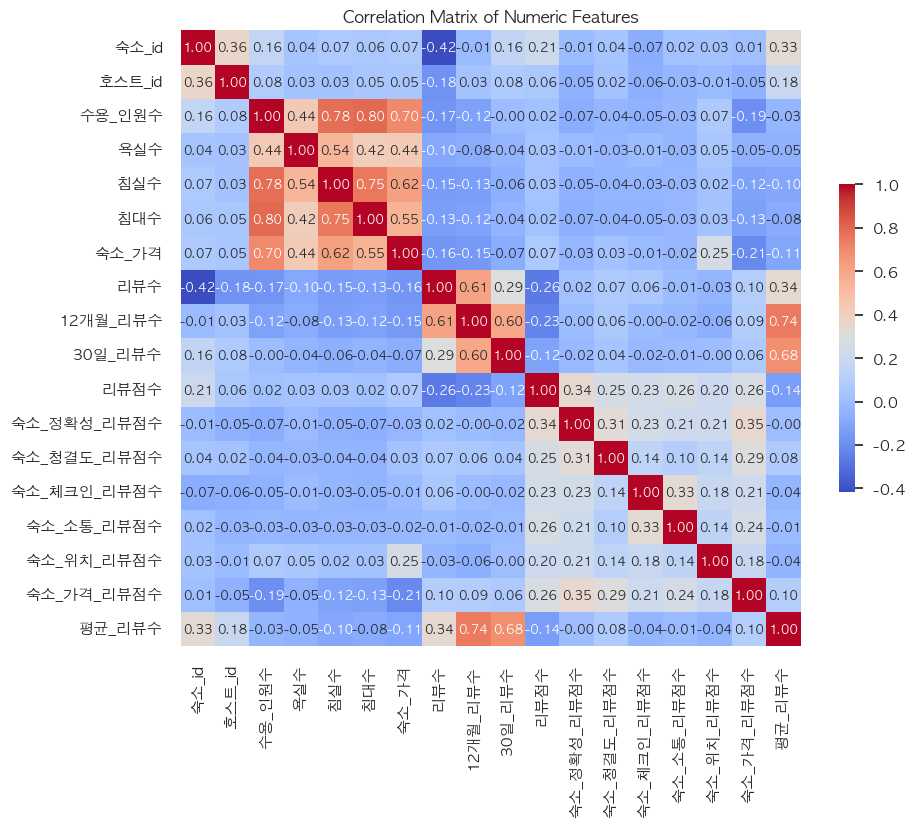

In [24]:
# 전체 데이터 상관계수
correlation_matrix_london = london_lists.corr()

# 히트맵
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_london, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': 0.5}, annot_kws={'size': 9})
plt.title('Correlation Matrix of Numeric Features')
# plt.savefig('./heatmap.png', dpi=300)

plt.show()

#### 히트맵을 보고 든 의문점
1. 게스트 선호 숙소(슈퍼호스트도 마찬가지)일 경우 왜 리뷰점수와 각 기준별 리뷰점수의 상관계수가 떨어지지? 
    - 에어비앤비 리뷰점수는 어떻게 카운팅되는거였지?
        - 강제성 여부 
        - 리뷰점수 매기는 기준 : https://team3weeklyproject.slack.com/archives/C072RMAKFUM/p1717291395655919

2. 슈퍼호스트 여부에 따른 리뷰점수에 따른 차이를 보려면 리뷰수가 같은 상태에서 차이를 내면 더 정확하지 않을까? 
    - 리뷰수를 구간 별로 나눠서 접근해봐도 괜찮지 않을까? 

### ANOVA
* 두 개 이상의 그룹 간의 평균 차이를 분석하는 방법 
* 범주형 데이터가 두 개 이상의 그룹으로 나뉘어질 때 사용
- 분산을 이용해 통계적 유의성을 검증 >> 분산 분석

#### 숙소_가격

In [26]:
from scipy.stats import f_oneway

# 함수 선언
def anova_result(standard, column):
    # Anova
    groupby_list  = london_lists.groupby(standard)[column].apply(list)
    f_stat, p_value = f_oneway(*groupby_list)
    # 출력
    if p_value > 0.05:
        result = '귀무가설 채택'
        trueorfalse = '없다.'
    else:
        result = "귀무가설 기각 > 대립가설 채택"
        trueorfalse = '있다.'
    print(f'{standard}별 {column} ANOVA(평균 값 차이) 분석: ')
    print(f"F-statistic: {f_stat}, p-value: {p_value}")
    print(f"{result} : {standard}별 {column} 평균 값의 차이가 {trueorfalse}")

# 카테고리 타입 컬럼 변수로 저장
category_columns = ['숙소_유형', '숙소_특징', '숙소_지역']

# 컬럼별 숙소_가격 Anova 분석 
for col in category_columns:
    anova_result(col, '숙소_가격')
    print()
    print('-' * 60)
    print()

숙소_유형별 숙소_가격 ANOVA(평균 값 차이) 분석: 
F-statistic: 2980.1959489298765, p-value: 0.0
귀무가설 기각 > 대립가설 채택 : 숙소_유형별 숙소_가격 평균 값의 차이가 있다.

------------------------------------------------------------

숙소_특징별 숙소_가격 ANOVA(평균 값 차이) 분석: 
F-statistic: 98.13140350596984, p-value: 0.0
귀무가설 기각 > 대립가설 채택 : 숙소_특징별 숙소_가격 평균 값의 차이가 있다.

------------------------------------------------------------

숙소_지역별 숙소_가격 ANOVA(평균 값 차이) 분석: 
F-statistic: 48.30324399685351, p-value: 1.50005114804048e-259
귀무가설 기각 > 대립가설 채택 : 숙소_지역별 숙소_가격 평균 값의 차이가 있다.

------------------------------------------------------------



#### 리뷰점수

In [27]:
# 컬럼별 리뷰점수 Anova 분석 
for col in category_columns:
    anova_result(col, '리뷰점수')
    print()
    print('-' * 60)
    print()

숙소_유형별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 8.213058784387993, p-value: 0.004178359420682854
귀무가설 기각 > 대립가설 채택 : 숙소_유형별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

숙소_특징별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 1.7186706294816665, p-value: 0.003656161883832116
귀무가설 기각 > 대립가설 채택 : 숙소_특징별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

숙소_지역별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 1.2195574810712435, p-value: 0.1843687604117235
귀무가설 채택 : 숙소_지역별 리뷰점수 평균 값의 차이가 없다.

------------------------------------------------------------



숙소 유형, 숙소 특징 모두 리뷰 점수 즉 고객이 느끼는 좋은 숙소의 조건으로 활용이 가능하다는 의미.

 
 어떤 관계가 있지? 여기를 파고 들자.

### 카이제곱 검정

In [28]:
from scipy.stats import chi2_contingency

def chi2_result(column1, column2):
    # chi2
    contingency_table = pd.crosstab(london_lists[column1], london_lists[column2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # 출력
    if p > 0.05:
        result = '귀무가설 채택'
        trueorfalse = '상호 독립적이다.'
    else:
        result = "귀무가설 기각 > 대립가설 채택"
        trueorfalse = '독립적이지 않고, 연관성이 있다.'
    
    print(f'{column1}과 {column2}의 독립성 분석: ')
    print(f"Chi-squared: {chi2}, p-value: {p}")
    print(f"{result} : {column1}과(와) {column2}는 {trueorfalse}")
    print()
    print('-' * 60)
    print()

category_columns = ['숙소_유형', '숙소_특징', '숙소_지역']

# Chi-squared 결과 조회
for i in range(len(category_columns)):
    for j in range(i+1, len(category_columns)):
        chi2_result(category_columns[i], category_columns[j])


숙소_유형과 숙소_특징의 독립성 분석: 
Chi-squared: 4483.319349971344, p-value: 0.0
귀무가설 기각 > 대립가설 채택 : 숙소_유형과(와) 숙소_특징는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

숙소_유형과 숙소_지역의 독립성 분석: 
Chi-squared: 395.4414123040441, p-value: 3.085621289774433e-64
귀무가설 기각 > 대립가설 채택 : 숙소_유형과(와) 숙소_지역는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

숙소_특징과 숙소_지역의 독립성 분석: 
Chi-squared: 2872.8953836507103, p-value: 1.5842345858374126e-129
귀무가설 기각 > 대립가설 채택 : 숙소_특징과(와) 숙소_지역는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------



- 숙소 유형은 숙소 지역과도 독립적이지 않음. 이는 특정 유형의 숙소가 특정 지역에 더 많이 위치한다는 것을 의미
- 숙소 특성은 숙소 지역과도 독립적이지 않음. 이는 특정 유형의 숙소가 특정 지역에 더 많이 위치한다는 것을 의미